In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
df = pd.read_csv("combined_2025_count_by_time.csv")

ts_col    = df.columns[0]  # should be the datetime string column
count_col = df.columns[1]  # should be the integer count column

In [26]:
df[ts_col] = pd.to_datetime(
    df[ts_col],
    format="%m/%d/%Y %I:%M:%S %p"  # e.g. "01/01/2025 01:00:00 AM"
)

# 4) Extract hour of day and day of week
df["hour"]        = df[ts_col].dt.hour + df[ts_col].dt.minute/60
df["day_of_week"] = df[ts_col].dt.day_name()

In [28]:
counts = (
    df
    .groupby(["hour","day_of_week"])[count_col]
    .sum()
    .unstack(fill_value=0)
)

weekday_order = [
    "Monday","Tuesday","Wednesday",
    "Thursday","Friday","Saturday","Sunday"
]
counts = counts.reindex(columns=weekday_order)

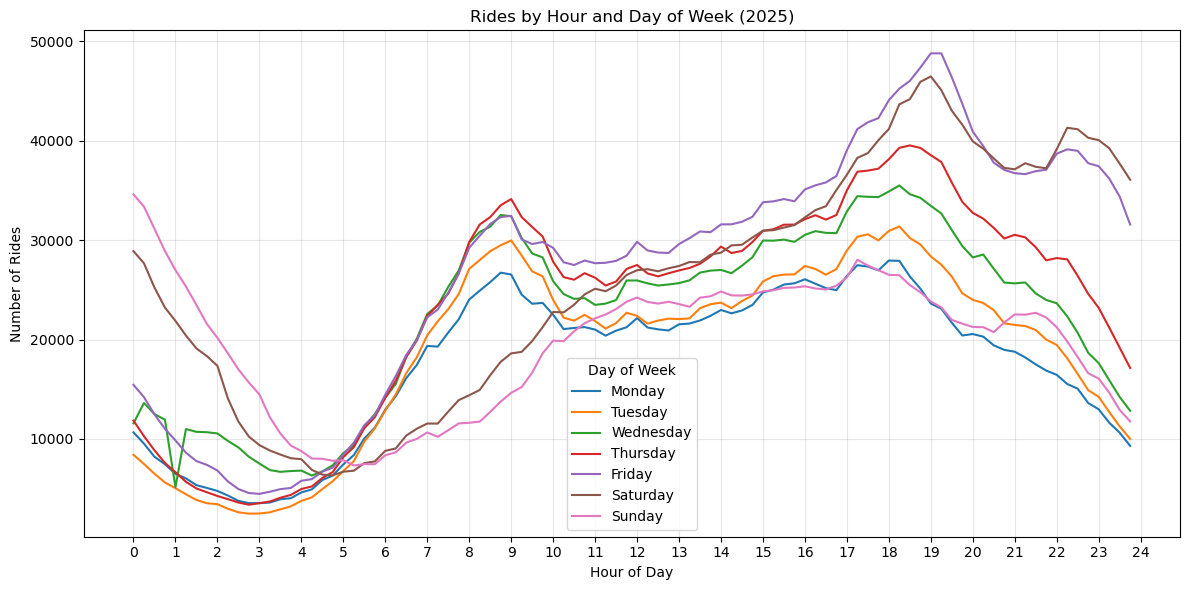

In [31]:
plt.figure(figsize=(12,6))
for day in counts.columns:
    plt.plot(counts.index, counts[day], label=day)

plt.xlabel("Hour of Day")
plt.ylabel("Number of Rides")
plt.title("Rides by Hour and Day of Week (2025)")
plt.xticks(range(0,25))
plt.legend(title="Day of Week")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()